<a href="https://colab.research.google.com/github/guebin/MP2024/blob/main/quiz/Quiz-7.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

| **항목**               | **허용 여부**        | **비고**                                          |
|------------------------|----------------------|---------------------------------------------------|
| **강의노트 참고**      | 허용                 | 수업 중 제공된 강의노트나 본인이 정리한 자료를 참고 가능       |
| **구글 검색**          | 허용                 | 인터넷을 통한 자료 검색 및 정보 확인 가능        |
| **생성 모형 사용**           | 허용 안함            | 인공지능 기반 도구(GPT 등) 사용 불가            |

{{<video https://youtu.be/playlist?list=PLQqh36zP38-yEeRCBlJDtUDDr5CESCXlE&si=dVV7eLd7fY6fFSsJ>}}

In [17]:
#!pip install datasets

In [2]:
import transformers
import datasets
#---#
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import torch
import torchvision

/home/cgb3/anaconda3/envs/hf/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# 1. `model`

`(1)` 아래의 자료를 관찰하라.

In [3]:
d = datasets.load_dataset("food101", split="train[:8]")
_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ToTensor(),
])
def transforms(examples):
    examples["pixel_values"] = [_transforms(img) for img in examples["image"]]
    del examples["image"]
    return examples
d = d.with_transform(transforms)[:8]
#d

`d`를 아래 `model`의 입력으로 사용하여 loss를 계산하라.

In [20]:
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=101,
)

config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


`(풀이)`

In [21]:
model.forward(
    labels=torch.tensor(d['label']),
    pixel_values=torch.stack(d['pixel_values'], axis=0)
)

ImageClassifierOutput(loss=tensor(4.5997, grad_fn=<NllLossBackward0>), logits=tensor([[ 7.6826e-02, -9.0105e-02,  7.5432e-02, -2.1185e-02,  1.5584e-01,
          7.3810e-02, -4.8122e-02, -5.3405e-02, -3.3512e-01, -2.2982e-01,
          6.2435e-02, -9.6915e-03,  8.9590e-03, -1.5497e-02,  1.8300e-01,
         -6.7354e-02,  1.9398e-01,  3.1862e-02, -3.0895e-02,  9.6069e-02,
         -1.6055e-01,  2.2154e-02, -8.2704e-02, -1.6198e-01,  1.0405e-01,
          3.8576e-02,  4.0748e-02,  9.8216e-02, -1.6747e-02, -2.5526e-02,
          8.3804e-02, -1.0589e-01,  2.5652e-02, -3.4092e-02, -9.8487e-02,
         -2.7755e-02,  1.0211e-02,  6.6089e-02,  7.3731e-02, -1.0649e-01,
          2.5525e-02,  4.8274e-02, -1.2212e-02,  1.1350e-01, -5.9155e-02,
          7.2843e-02, -5.7654e-02,  2.6358e-02, -1.4207e-02,  1.3983e-01,
          6.7270e-02, -8.4355e-02, -8.4920e-02,  8.4042e-02,  6.3501e-02,
         -1.2900e-01, -5.7161e-02,  1.6566e-01, -1.2487e-01, -9.7119e-02,
         -1.5221e-01,  2.1401e-01,

`(2)` 아래의 자료를 관찰하라.

In [22]:
d = datasets.load_dataset("food101", split="train[:1]")
_transforms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224)),
    torchvision.transforms.ToTensor(),
])
def transforms(examples):
    examples["pixel_values"] = [_transforms(img) for img in examples["image"]]
    del examples["image"]
    return examples
d = d.with_transform(transforms)[0]
d

{'label': 6,
 'pixel_values': tensor([[[0.1216, 0.1176, 0.1176,  ..., 0.0078, 0.0039, 0.0000],
          [0.1333, 0.1294, 0.1255,  ..., 0.0039, 0.0000, 0.0000],
          [0.1451, 0.1373, 0.1333,  ..., 0.0039, 0.0000, 0.0000],
          ...,
          [0.2235, 0.2157, 0.2471,  ..., 0.3569, 0.3725, 0.3529],
          [0.2627, 0.2588, 0.2314,  ..., 0.3490, 0.3608, 0.3608],
          [0.2431, 0.2627, 0.2549,  ..., 0.3373, 0.3412, 0.3373]],
 
         [[0.1373, 0.1333, 0.1333,  ..., 0.1059, 0.1020, 0.0980],
          [0.1490, 0.1451, 0.1412,  ..., 0.1020, 0.0980, 0.0941],
          [0.1608, 0.1529, 0.1490,  ..., 0.1020, 0.0941, 0.0863],
          ...,
          [0.2157, 0.2078, 0.2431,  ..., 0.3333, 0.3490, 0.3333],
          [0.2510, 0.2471, 0.2235,  ..., 0.3216, 0.3451, 0.3529],
          [0.2314, 0.2510, 0.2431,  ..., 0.3098, 0.3294, 0.3333]],
 
         [[0.1451, 0.1451, 0.1451,  ..., 0.0941, 0.0902, 0.0863],
          [0.1608, 0.1569, 0.1529,  ..., 0.0902, 0.0863, 0.0824],
          [

`d`를 아래 `model`의 입력으로 사용하여 loss를 계산하라.

In [23]:
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=101,
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


`(풀이)`

In [24]:
model.forward(
    labels=torch.tensor([d['label']]),
    pixel_values=torch.stack([d['pixel_values']], axis=0)
)

ImageClassifierOutput(loss=tensor(4.5957, grad_fn=<NllLossBackward0>), logits=tensor([[ 0.1519,  0.0421,  0.0847, -0.0296, -0.1074,  0.0327,  0.0381,  0.1434,
          0.0762,  0.1087,  0.0567,  0.2495, -0.1418, -0.0435, -0.0919, -0.2366,
         -0.0408, -0.2031,  0.0534, -0.0367,  0.0771, -0.1781, -0.0031,  0.0235,
         -0.0508, -0.2475,  0.2553,  0.0192, -0.1095,  0.0517, -0.0726, -0.0424,
         -0.0214,  0.1052,  0.1299,  0.2157, -0.1121, -0.0293, -0.0680,  0.0239,
          0.0805,  0.2058, -0.0433,  0.0341, -0.0848, -0.0193, -0.0263,  0.0058,
         -0.0062, -0.0518, -0.0941,  0.1879, -0.0868, -0.0237, -0.0055,  0.0460,
         -0.0067,  0.1300,  0.0287, -0.0236,  0.1007,  0.2171,  0.1671, -0.0045,
          0.1083, -0.1243, -0.0193,  0.1496,  0.1563,  0.0729,  0.0076,  0.0756,
         -0.0562,  0.1650,  0.0549, -0.0824,  0.0041,  0.0151,  0.1223,  0.0802,
         -0.0875,  0.0186,  0.0311,  0.0323,  0.0155,  0.1161, -0.1092,  0.1090,
         -0.1826, -0.1482,  0.1

`(3)` 아래의 자료 `image1` `image2`를 관찰하라.

In [25]:
from PIL import Image
import requests
from io import BytesIO

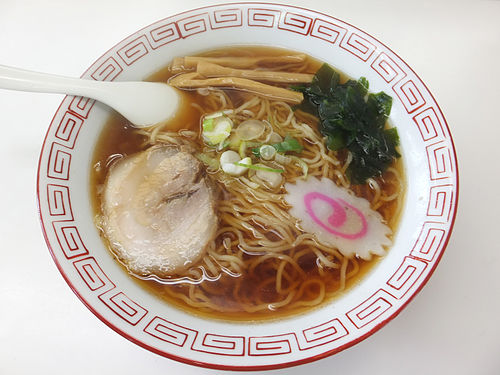

In [26]:
url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Shoyu_ramen%2C_at_Kasukabe_Station_%282014.05.05%29_1.jpg/500px-Shoyu_ramen%2C_at_Kasukabe_Station_%282014.05.05%29_1.jpg"
response = requests.get(url)
image1 = Image.open(BytesIO(response.content))
image1

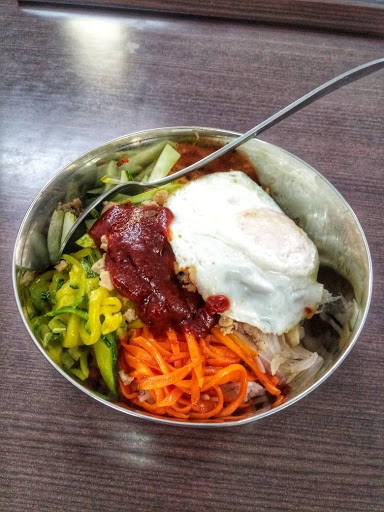

In [27]:
url = "https://upload.wikimedia.org/wikipedia/commons/f/f9/Bibimbap_made_by_Mrs._Jang.jpg"
response = requests.get(url)
image2 = Image.open(BytesIO(response.content))
image2

 `image1`, `image2` 를 적당히 변환하여 `(2,3,224,224)` 의 tensor로 만든뒤 아래의 모형의 입력으로 사용하라.

In [28]:
config = transformers.AutoConfig.from_pretrained("google/vit-base-patch16-224-in21k")
config.image_size = 224
config.num_labels = 101
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    config=config,

)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Notes**

1. 정규화를 생략하고 텐서 변환과 리사이즈 정도의 변환만 수행해도 정답으로 인정함.
2. 라벨은 모델에 전달하지 않아도 무방함. 즉 loss는 계산하지 않아도 무방함.

`(풀이)`

In [30]:
f = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((224, 224))
])
model(pixel_values=torch.stack([f(image1), f(image2)]))

ImageClassifierOutput(loss=None, logits=tensor([[-0.0653,  0.0641,  0.0275, -0.0767,  0.0914, -0.0843, -0.0095,  0.0794,
         -0.0525,  0.1611, -0.0290, -0.0571,  0.0638, -0.0695, -0.1568, -0.1168,
          0.1073, -0.1338,  0.0023,  0.1203, -0.0574, -0.0785, -0.0967, -0.1262,
         -0.1663,  0.0729, -0.0902, -0.2013, -0.0517,  0.0591, -0.0118, -0.0183,
          0.0222,  0.0441, -0.0946,  0.0083, -0.0043, -0.0057,  0.0671, -0.0847,
         -0.0680,  0.1215,  0.0185,  0.1103,  0.0807, -0.0700,  0.0117,  0.2419,
         -0.0970, -0.0554,  0.1159,  0.0334, -0.0426,  0.1251, -0.0690,  0.0834,
         -0.1035,  0.0099,  0.1139,  0.0088,  0.1347, -0.2821, -0.0401, -0.1899,
          0.0491,  0.2097,  0.0962, -0.1737,  0.1471, -0.0153, -0.0048, -0.0831,
         -0.0085,  0.0331,  0.0406, -0.1343, -0.0871,  0.0433, -0.1360,  0.1215,
         -0.1829,  0.0775,  0.0150, -0.0069,  0.0531,  0.0831, -0.0082, -0.0597,
         -0.1527, -0.1363,  0.0086,  0.0749, -0.0558, -0.1586, -0.069

`(4)` (3)에서의 `image1`, `image2` 를 적당히 변환하여 `(2,3,?,?)` 의 tensor로 만든뒤 아래의 모형의 입력으로 사용하라.

In [31]:
config = transformers.AutoConfig.from_pretrained("google/vit-base-patch16-224-in21k")
config.image_size = 64
config.num_labels = 101
model = transformers.AutoModelForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    config = config,
    ignore_mismatched_sizes = True
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized because the shapes did not match:
- embeddings.position_embeddings: found shape torch.Size([1, 197, 768]) in the checkpoint and torch.Size([1, 17, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


**Notes**

1. 정규화를 생략하고 텐서 변환과 리사이즈 정도의 변환만 수행해도 정답으로 인정함.
2. 라벨은 모델에 전달하지 않아도 무방함. 즉 loss는 계산하지 않아도 무방함.

`(풀이)`

In [32]:
f = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Resize((64, 64))
])
model(pixel_values=torch.stack([f(image1), f(image2)]))

ImageClassifierOutput(loss=None, logits=tensor([[ 0.0212, -0.0771, -0.0605, -0.1835, -0.1227,  0.0089, -0.0588,  0.1302,
          0.0353, -0.0484,  0.0964,  0.1646,  0.0236, -0.0040, -0.1185, -0.0121,
         -0.0385,  0.1722, -0.0205, -0.0439,  0.1443, -0.1304,  0.0570, -0.0637,
          0.1146,  0.1022, -0.0157,  0.0319,  0.0633, -0.0815,  0.0293,  0.0164,
         -0.0655,  0.0314, -0.0423,  0.1512, -0.0016, -0.1842,  0.1167,  0.0589,
         -0.0171, -0.1791, -0.0386, -0.0535,  0.0894, -0.0842,  0.0456,  0.0558,
          0.0240,  0.0595,  0.0602, -0.0988,  0.0933,  0.0183,  0.0151, -0.0570,
         -0.0357,  0.0562, -0.0198,  0.0265, -0.1284, -0.0572,  0.1064,  0.0464,
          0.0803,  0.0060,  0.0522,  0.0900, -0.0575, -0.0059, -0.0342, -0.0069,
          0.0229,  0.0527,  0.1081,  0.0243,  0.0328,  0.1047, -0.0259, -0.0383,
         -0.1083, -0.0758, -0.1305,  0.0086, -0.0492, -0.0067,  0.0770, -0.0387,
         -0.1297,  0.0194, -0.0423, -0.0907,  0.0726,  0.0027,  0.023

`(5)` 아래의 자료를 관찰하라.

In [33]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2024/refs/heads/main/posts/mbti_1.csv")
mbti = datasets.Dataset.from_pandas(df)

In [34]:
def transform(example):
    result = dict()
    if "E" in example['type']:
        result['labels'] = 1
    else:
        result['labels'] = 0
    del example['type']
    return result

mbti = mbti.map(transform)

Map:   0%|          | 0/8675 [00:00<?, ? examples/s]

In [35]:
d = mbti.select(range(10))
d

Dataset({
    features: ['posts', 'labels'],
    num_rows: 10
})

`d`를 아래 `model`의 입력으로 사용하여 loss를 계산하라.

In [36]:
model = transformers.AutoModelForSequenceClassification.from_pretrained(
    "distilbert/distilbert-base-uncased", num_labels=2
)

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


`(풀이)`

In [2]:
tokenizer = transformers.AutoTokenizer.from_pretrained(
    "distilbert/distilbert-base-uncased"
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [44]:
tokenizer(d['posts'],padding=True,truncation=True,return_tensors="pt")

{'input_ids': tensor([[  101,  1005,  8299,  ...,  2017,  2215,   102],
        [  101,  1005,  1045,  ...,  3259,  2028,   102],
        [  101,  1005,  2204,  ...,  1012,  2077,   102],
        ...,
        [  101,  1005,  1045,  ...,  2129, 15743,   102],
        [  101,  1045,  1005,  ...,  2107,  2004,   102],
        [  101,  1005, 16770,  ...,  1045,  3246,   102]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])}

In [45]:
model.forward(
    **tokenizer(d['posts'],padding=True,truncation=True,return_tensors="pt")
)

SequenceClassifierOutput(loss=None, logits=tensor([[-0.1040, -0.0686],
        [-0.0636, -0.0867],
        [-0.0767, -0.0764],
        [-0.0361, -0.1272],
        [-0.0618, -0.1035],
        [-0.0342, -0.1299],
        [-0.0274, -0.1071],
        [-0.0250, -0.1089],
        [-0.0660, -0.0784],
        [-0.0604, -0.1017]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

`(6)` 아래의 자료를 관찰하라.

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/MP2024/refs/heads/main/posts/mbti_1.csv")
mbti = datasets.Dataset.from_pandas(df)

In [5]:
tokenizer = transformers.AutoTokenizer.from_pretrained(
    "distilbert/distilbert-base-uncased"
)
tokenized = tokenizer(mbti.select(range(2))['posts'],padding=True,return_tensors="pt")
tokenized

Token indices sequence length is longer than the specified maximum sequence length for this model (2102 > 512). Running this sequence through the model will result in indexing errors


{'input_ids': tensor([[ 101, 1005, 8299,  ...,    0,    0,    0],
        [ 101, 1005, 1045,  ..., 1012, 1005,  102]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]])}

`tokenized`를 입력으로 받을수 있는 모형을 설계하고 아래를 실행하라. (loss는 계산하지 않아도 무방함)

In [9]:
#model(**tokenized)

`(풀이)`

In [6]:
tokenized['input_ids'].shape

torch.Size([2, 2102])

In [7]:
config = transformers.AutoConfig.from_pretrained(
    "distilbert/distilbert-base-uncased"
)
config.max_position_embeddings = 2273
model = transformers.AutoModelForSequenceClassification.from_config(
    config=config
)

In [8]:
model(**tokenized)

SequenceClassifierOutput(loss=None, logits=tensor([[-0.0858,  0.8048],
        [-0.0705,  0.4062]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

`(7)` 아래는 음성인식을 위한 모델이다.

In [10]:
model =transformers.AutoModelForAudioClassification.from_pretrained(
    "facebook/wav2vec2-base"
)

config.json:   0%|          | 0.00/1.84k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:306: UserWarning: Passing `gradient_checkpointing` to a config initialization is deprecated and will be removed in v5 Transformers. Using `model.gradient_checkpointing_enable()` instead, or if you are using the `Trainer` API, pass `gradient_checkpointing=True` in your `TrainingArguments`.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/380M [00:00<?, ?B/s]

Some weights of Wav2Vec2ForSequenceClassification were not initialized from the model checkpoint at facebook/wav2vec2-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'projector.bias', 'projector.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


이 모델의 입력을 아래와 같이 설정하였으나 에러가 발생했다.

In [11]:
model(
    input_values = torch.tensor([1]*1000).reshape(1,1000),
    attention_mask = torch.tensor([1]*1000).reshape(1,1000)
)

RuntimeError: expected scalar type Long but found Float

코드를 수정하여 올바른 입력데이터를 넣어라.

`(풀이)`

In [13]:
model(
    input_values = torch.tensor([1]*1000).reshape(1,1000).float(),
    attention_mask = torch.tensor([1]*1000).reshape(1,1000)
)

SequenceClassifierOutput(loss=None, logits=tensor([[-0.0334,  0.1047]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

# 2. `with`

`(1)` 아래의 코드를 관찰하라.

In [2]:
tsr = torch.randn(10,16,3,224,224)
model = transformers.VideoMAEForVideoClassification.from_pretrained(
    "MCG-NJU/videomae-base",
)
model(tsr)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImageClassifierOutput(loss=None, logits=tensor([[ 0.4060,  0.1346],
        [ 0.1393,  0.0789],
        [ 0.1066,  0.0795],
        [ 0.1970, -0.0070],
        [ 0.1905,  0.1503],
        [ 0.2089,  0.1376],
        [ 0.0104, -0.0011],
        [ 0.2811,  0.1901],
        [ 0.2035,  0.1625],
        [ 0.2755, -0.0095]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

 `with torch.no_grad()` 를 사용하여 `logits`에 `grad_fn=<AddmmBackward0>` 이 포함되지 않도록 위 코드를 수정하라.

`(풀이)`

In [4]:
with torch.no_grad():
  print(model(tsr))

ImageClassifierOutput(loss=None, logits=tensor([[ 0.4060,  0.1346],
        [ 0.1393,  0.0789],
        [ 0.1066,  0.0795],
        [ 0.1970, -0.0070],
        [ 0.1905,  0.1503],
        [ 0.2089,  0.1376],
        [ 0.0104, -0.0011],
        [ 0.2811,  0.1901],
        [ 0.2035,  0.1625],
        [ 0.2755, -0.0095]]), hidden_states=None, attentions=None)


`(2)` 아래의 코드를 관찰하라.

In [3]:
tsr = torch.randn(10,16,3,224,224)
model = transformers.VideoMAEForVideoClassification.from_pretrained(
    "MCG-NJU/videomae-base",
)
model(tsr)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImageClassifierOutput(loss=None, logits=tensor([[-0.1040, -0.0061],
        [-0.0597,  0.2367],
        [-0.2060,  0.2247],
        [-0.2293,  0.1689],
        [-0.2859,  0.1811],
        [-0.2340,  0.1257],
        [-0.0881,  0.1403],
        [-0.2519,  0.1412],
        [-0.1075,  0.0054],
        [-0.2806,  0.1081]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

아래와 같이 동작하는 적절한 클래스 `NoGradContext` 를 설계하라.

In [6]:
with NoGradContext():
    tsr = torch.randn(10,16,3,224,224)
    model = transformers.VideoMAEForVideoClassification.from_pretrained(
        "MCG-NJU/videomae-base",
    )
    print(model(tsr))

Some weights of VideoMAEForVideoClassification were not initialized from the model checkpoint at MCG-NJU/videomae-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ImageClassifierOutput(loss=None, logits=tensor([[-0.2523, -0.5055],
        [-0.1680, -0.5540],
        [-0.3205, -0.4462],
        [-0.1461, -0.6196],
        [-0.1723, -0.6704],
        [-0.1323, -0.5601],
        [-0.2817, -0.4697],
        [-0.1575, -0.4805],
        [-0.2094, -0.4485],
        [-0.2593, -0.5014]]), hidden_states=None, attentions=None)


`(풀이)`

In [5]:
class NoGradContext:
  def __enter__(self):
    torch.set_grad_enabled(False)
  def __exit__(self,*args):
    torch.set_grad_enabled(True)


`(3)` 아래와 같은 `dataframe`을 살펴보자.

In [7]:
df = pd.DataFrame(np.random.randn(61,2))
display(df)

,0,1
0,1.797597,-0.509486
1,2.026591,-1.130091
2,0.774137,-0.393504
3,0.859450,-0.689825
4,-0.930429,-0.715551
...,...,...
56,-0.720481,-0.116972
57,-1.127292,2.401930
58,1.819896,2.160495
59,-0.034305,0.247947


이 `df`에는 일부 rows가 생략되어 출력되는데, 이는 때때로 불편하다. 생략되지 않은 출력을 잠시 보기 위하여 아래와 같은 코드를 사용할 수 있다.

In [6]:
# pd.set_option('display.max_rows', None)  # 모든 행 출력
# display(df) # 모든행이 출력됨

In [7]:
# pd.reset_option('display.max_rows') # 원래상태로 복원
# display(df) # 다시 일부행만 출력됨

때떄로 모든 행을 출력하고 싶을때를 대비하여 아래와 같은 동작이 가능한 적당한 클래스 `DisplayAllRows`을 설계하라.

In [8]:
# # 평소에는 생략된출력
# display(df)

In [9]:
# # 원할때는 모든 rows를 출력
# with DisplayAllRows():
#     display(df)

`(풀이)`

In [13]:
class DisplayAllRows:
  def __enter__(self):
    pd.set_option('display.max_rows', None)
  def __exit__(self,*args):
    pd.reset_option('display.max_rows')